## 4. Classification Model Building


### 4.1 Train-Test Split for Model Evaluation

In [41]:
import pandas as pd
from get_more_features import *

df = pd.read_csv('dataset.csv')

In [42]:
df.head(5)

,Label,cleaned_review_text,count_positive_words,count_negative_words,contain_no,contain_not,contain_exclamation,log_review_length,emotion_label,sentiment_score
0,0,ergonomic shape memory stick,0,0,0,0,0,3.332205,1,0.000000
1,1,light amp solid easy amp straight forward to u...,4,0,0,0,0,4.499810,1,0.247222
2,0,voice recognition phonebook manual,0,0,0,0,0,3.526361,1,0.000000
3,1,high quality glass lens system aluminum body m...,0,0,0,0,0,4.304065,1,0.330000
4,0,dark lcd pricey lack of documentation flimsy b...,0,4,0,0,0,4.043051,0,-0.150000


In [43]:
df['cleaned_review_text'] = df['cleaned_review_text'].fillna('')

In [44]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from scipy.sparse import csr_matrix, hstack
from embedding_word import *

In [45]:
y = df['Label']
X = df.drop(columns=['Label'],axis=1)

In [46]:
# Train a Word2Vec model
cleaned_reviews = [review.split() for review in df['cleaned_review_text']]
model = Word2Vec(sentences=cleaned_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Convert text data using Word2Vec embeddings
X_text_transformed = text_to_word_embeddings(df['cleaned_review_text'], model)

# Convert numeric features to arrays
X_numeric_features = X.drop(columns=['cleaned_review_text']).values

# Convert numeric features to sparse matrices
X_numeric_sparse = csr_matrix(X_numeric_features)

# Concatenate the word embeddings and other features
X = hstack([X_text_transformed, X_numeric_sparse])


In [96]:
model.save("word2vec_model.bin")

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X , df['Label'], test_size=0.2, random_state=42, stratify= df['Label'])

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Convert the sparse matrix to a dense array for visualization
X_train_dense = X_train.toarray()
X_train_scaled_dense = X_train_scaled.toarray()

# Create a DataFrame for better visualization (optional)
columns = [f'Feature_{i}' for i in range(X_train_dense.shape[1])]
X_train_df = pd.DataFrame(data=X_train_dense, columns=columns)
X_train_scaled_df = pd.DataFrame(data=X_train_scaled_dense, columns=columns)


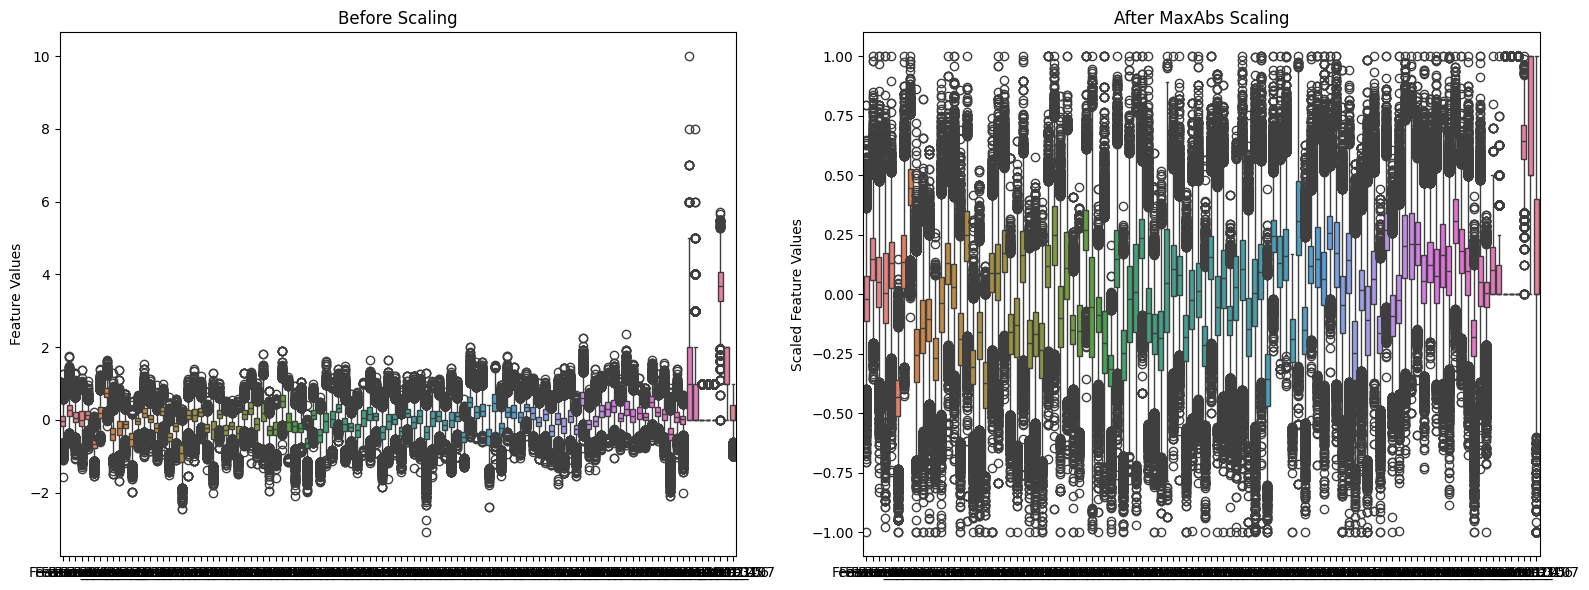

In [49]:

# Plot side-by-side boxplots
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_df, orient='v')
plt.title('Before Scaling')
plt.ylabel('Feature Values')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled_df, orient='v')
plt.title('After MaxAbs Scaling')
plt.ylabel('Scaled Feature Values')

plt.tight_layout()
plt.show()


### 4.3 Model Training: Multinomial Naive Bayes Classifier ( MultinomialNB )

#### 4.3.1 Using with Countvector

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
nb_countvec = MultinomialNB()

In [51]:
X_train_texts = [" ".join(map(str, row.data)) for row in csr_matrix(X_train_scaled_df)]

+ Convert X_Train to vecounter

In [52]:
X_train_count_vect = vectorizer.fit_transform(X_train_texts)

In [53]:
nb_countvec.fit(X_train_count_vect ,y_train)

MultinomialNB()

#### 4.3.2 Using with TF-IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

nb_tfidf = MultinomialNB()

In [55]:
X_train_tf_idf_vect = tf_idf_vectorizer.fit_transform(X_train_texts)

In [56]:
nb_tfidf.fit(X_train_tf_idf_vect,y_train)

MultinomialNB()

### 4.4 Model Training: Logistic Regression

In [57]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(X_train,y_train)

### 4.5 Model Training: Random Forest 

In [58]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()

In [59]:
# rf.fit(X_train,y_train)

### 4.6 Model Training: xgboost classifier 

In [60]:
from xgboost import XGBClassifier

# Correct variable name for XGBClassifier
xgb = XGBClassifier()

In [61]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 4.7 Model Training: Support Vector Machine (SVM) 

In [62]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel


In [63]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

### 4.8 Model Training: Multi-layer Perceptron classifier (MLPClassifier)

In [64]:
from sklearn.neural_network import MLPClassifier

# Correct variable name for MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, activation='relu', solver='adam', random_state=42)

mlp.fit(X_train,y_train)

## 5. Predictions on Example Reviews 

In [66]:
X_test_numeric_scaled = scaler.transform(X_test)

In [67]:
X_test_texts = [" ".join(map(str, row.data)) for row in X_test_numeric_scaled]

In [68]:
X_test_count_vect = vectorizer.transform(X_test_texts )
X_test_tfidf_vect = tf_idf_vectorizer.transform(X_test_texts )

In [69]:
multinomialnb_predictions_with_count_vect = nb_countvec.predict(X_test_count_vect)
multinomialnb_predictions_with_tfidf = nb_tfidf.predict(X_test_tfidf_vect)

In [70]:
# Make predictions
# logistic_regression_predictions = lr.predict(X_test_numeric_scaled)
# random_forest_predictions = rf.predict(X_test_numeric_scaled)
MLPClassifier_predictions = mlp.predict(X_test_numeric_scaled)
xgbclassifier_predictions = xgb.predict(X_test_numeric_scaled)
svm_predictions = clf.predict(X_test_numeric_scaled)


In [71]:
print("Multinomial Naive Bayes Predictions with CountVectorizer:", multinomialnb_predictions_with_count_vect)
print("Multinomial Naive Bayes Predictions with TF-IDF:", multinomialnb_predictions_with_tfidf)
# print("Logistic Regression Predictions :", logistic_regression_predictions)
# print("Random Forest Predictions :", random_forest_predictions )
print("MLPClassifier Predictions :", MLPClassifier_predictions)
print("XGBoost Classifier Predictions :", xgbclassifier_predictions)
print("SVM Predictions :", svm_predictions)


Multinomial Naive Bayes Predictions with CountVectorizer: [0 1 0 ... 1 1 0]
Multinomial Naive Bayes Predictions with TF-IDF: [0 1 0 ... 1 1 0]
MLPClassifier Predictions : [0 1 1 ... 0 1 0]
XGBoost Classifier Predictions : [0 1 0 ... 1 1 0]
SVM Predictions : [0 1 0 ... 0 1 0]


## 6. Model Evaluation and Accuracy Metrics 

In [72]:
from sklearn.metrics import accuracy_score


# Calculate accuracy for each classifier
accuracy_multinomialnb_count_vect = accuracy_score(y_test, multinomialnb_predictions_with_count_vect)
accuracy_multinomialnb_tfidf = accuracy_score(y_test, multinomialnb_predictions_with_tfidf)
# accuracy_logistic_regression = accuracy_score(y_test, logistic_regression_predictions)
# accuracy_random_forest = accuracy_score(y_test, random_forest_predictions)
accuracy_MLPClassifier = accuracy_score(y_test, MLPClassifier_predictions)
accuracy_xgbclassifier = accuracy_score(y_test, xgbclassifier_predictions)
accuracy_svm = accuracy_score(y_test, svm_predictions)

# Print accuracy for each classifier
print("Accuracy - Multinomial Naive Bayes with CountVectorizer:", accuracy_multinomialnb_count_vect)
print("Accuracy - Multinomial Naive Bayes with TF-IDF:", accuracy_multinomialnb_tfidf)
# print("Accuracy - Logistic Regression:", accuracy_logistic_regression)
# print("Accuracy - Random Forest:", accuracy_random_forest)
print("Accuracy - MLPClassifier:", accuracy_MLPClassifier)
print("Accuracy - XGBoost Classifier:", accuracy_xgbclassifier)
print("Accuracy - SVM:", accuracy_svm)


Accuracy - Multinomial Naive Bayes with CountVectorizer: 0.7462380300957593
Accuracy - Multinomial Naive Bayes with TF-IDF: 0.7454172366621067
Accuracy - MLPClassifier: 0.7053351573187414
Accuracy - XGBoost Classifier: 0.9025991792065663
Accuracy - SVM: 0.853625170998632


In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification Report
print("Classification Report:\n", classification_report(y_test, MLPClassifier_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, MLPClassifier_predictions)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      3566
           1       0.72      0.70      0.71      3744

    accuracy                           0.71      7310
   macro avg       0.71      0.71      0.71      7310
weighted avg       0.71      0.71      0.71      7310

Confusion Matrix:
 [[2545 1021]
 [1133 2611]]


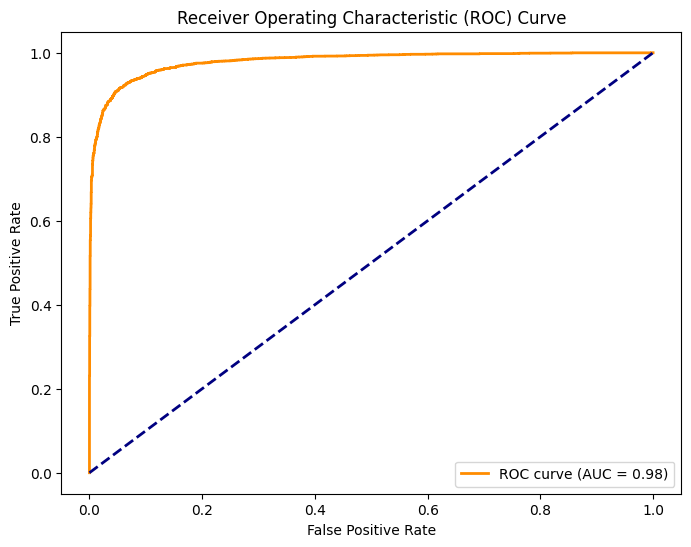

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = mlp.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


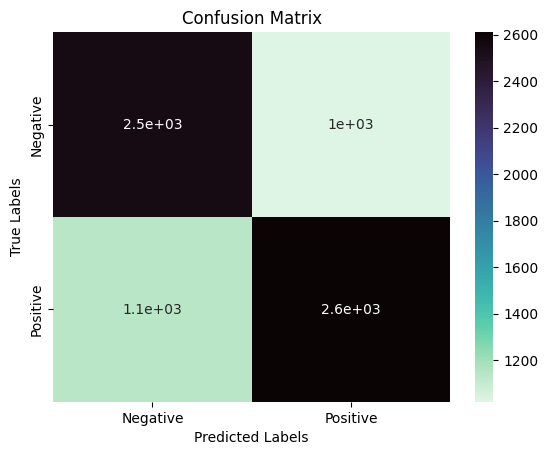

In [93]:
# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='mako_r', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 7. Results Analysis and Conclusion

In [85]:
from text_preprocess import clean_text
import pandas as pd

# Example Reviews
new_reviews = [
    "This movie was fantastic! I loved every moment of it.",
    "The product quality was terrible. I regret buying it.",
    "Very cute shorts. sadly, after one wash they became a lint magnet so had to be returned. disappointing quality.",
    "Fits like a bag :( I was stoked to get this dress, and it is truly beautiful, but the fit is so awful. it was like being swallowed up by a bag.",
    "This dress is terrible! The fit is awful, and the fabric is uncomfortable. The design is cheap, and the color is not as described. I regret buying it, and I will never wear it again",
    "I absolutely love this dress! The fit is perfect, and the fabric is so comfortable. The design is elegant, and the color is stunning. I received so many compliments when I wore it to the party last night. It is definitely my new favorite dress, and I can not wait to wear it again"
]

# Text Preprocessing for New Reviews
cleaned_new_reviews = [clean_text(review) for review in new_reviews]

# Convert new reviews to Word2Vec embeddings
new_reviews_transformed = text_to_word_embeddings(cleaned_new_reviews, model)

# Convert numeric features for new reviews
new_reviews_numeric_features = pd.DataFrame({
    'count_positive_words': [count_positive_words(review) for review in cleaned_new_reviews],
    'count_negative_words': [count_negative_words(review) for review in cleaned_new_reviews],
    'contain_no': [contain_no(review) for review in cleaned_new_reviews],
    'contain_not': [contain_not(review) for review in cleaned_new_reviews],
    'contain_exclamation': [contain_exclamation(review) for review in cleaned_new_reviews],
    'log_review_length': [log_review_length(review) for review in cleaned_new_reviews],
    'emotion_label': [get_emotion_label(review) for review in cleaned_new_reviews],
    'sentiment_score': [calculate_sentiment_score(review) for review in cleaned_new_reviews],
})

# Concatenate the word embeddings and other features for new reviews
new_reviews_data = hstack([new_reviews_transformed, csr_matrix(new_reviews_numeric_features)])


In [86]:

# Scale the new reviews data using MaxAbsScaler
new_reviews_scaled = scaler.transform(new_reviews_data)

new_reviews_scaled_text_for_vectorizer = [" ".join(map(str, row.data)) for row in new_reviews_scaled]

new_reviews_count_vect = vectorizer.transform(new_reviews_scaled_text_for_vectorizer )
new_reviews_tfidf_vect = tf_idf_vectorizer.transform(new_reviews_scaled_text_for_vectorizer )


In [87]:

# Make Predictions for each model
nb_count_vect_predictions = nb_countvec.predict(new_reviews_count_vect )
nb_tfidf_predictions = nb_tfidf.predict(new_reviews_tfidf_vect)
# lr_predictions = lr.predict(new_reviews_scaled)
# rf_predictions = rf.predict(new_reviews_scaled)
mlp_predictions = mlp.predict(new_reviews_scaled)
xgb_predictions = xgb.predict(new_reviews_scaled)
svm_predictions = clf.predict(new_reviews_scaled)


In [88]:

# Display Predictions
print("Multinomial Naive Bayes Predictions with CountVectorizer:", nb_count_vect_predictions)
print("Multinomial Naive Bayes Predictions with TF-IDF:", nb_tfidf_predictions)
# print("Logistic Regression Predictions:", lr_predictions)
# print("Random Forest Predictions:", rf_predictions)
print("MLPClassifier Predictions:", mlp_predictions)
print("XGBoost Classifier Predictions:", xgb_predictions)
print("SVM Predictions:", svm_predictions)


Multinomial Naive Bayes Predictions with CountVectorizer: [1 0 0 1 0 1]
Multinomial Naive Bayes Predictions with TF-IDF: [1 0 0 1 0 1]
MLPClassifier Predictions: [1 0 0 1 0 1]
XGBoost Classifier Predictions: [1 0 0 1 0 1]
SVM Predictions: [0 0 0 0 0 1]


In [95]:
import joblib
joblib.dump(mlp, 'mlp_model.pkl')

['mlp_model.pkl']

In [97]:

# Assuming 'scaler' is your MaxAbsScaler
joblib.dump(scaler, 'maxabs_scaler.pkl')


['maxabs_scaler.pkl']